<font color="blue" size=5><b>Support Vector Machine</b></font>

## Problem Statement

Given details of loan application predict the loan will be granted or not.

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

---

## Dataset

Dataset includes details of different loan applications along with the application status:

- __Loan_ID__: LP001002(Application ID)
- __Gender__: Male/Female
- __ApplicantIncome__: Monthly income of the applicant
- __LoanAmount__: Amount to be loaned
- __Loan_Status__: Either the application has been accepted or not(Y/N)


<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Data</h3></li></ul>
</div>

In [2]:
loan_data=pd.read_csv('loan_grant.csv')

In [3]:
loan_data.head()

,Loan_ID,Gender,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,5849,NaN,Y
1,LP001003,Male,4583,128.0,N
2,LP001005,Male,3000,66.0,Y
3,LP001006,Male,2583,120.0,Y
4,LP001008,Male,6000,141.0,Y


In [4]:
#Dataset shape to get number of rows and columns
loan_data.shape

(614, 5)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          614 non-null    object 
 1   Gender           601 non-null    object 
 2   ApplicantIncome  614 non-null    int64  
 3   LoanAmount       592 non-null    float64
 4   Loan_Status      614 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 24.1+ KB


<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Datatypes</h3></li></ul>
</div>

In [6]:
loan_data.dtypes

,0
Loan_ID,object
Gender,object
ApplicantIncome,int64
LoanAmount,float64
Loan_Status,object


<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Null Values</h3></li></ul>
</div>

In [ ]:
#Checking for null values
loan_data.isnull().sum()

Loan_ID             0
Gender             13
ApplicantIncome     0
LoanAmount         22
Loan_Status         0
dtype: int64

In [7]:
loan_data.isna().sum()

,0
Loan_ID,0
Gender,13
ApplicantIncome,0
LoanAmount,22
Loan_Status,0


<div style="background-color:##EDF9FF">
  <ul><li><h3>Treating Null values</h3></li></ul>
</div>

In [9]:
# Create an empty list to store the updated values
gender=[]

# Calculate the mode of the 'Gender' column
val=loan_data.Gender.mode()
# Iterate through the 'Gender' column
for i in loan_data.Gender:
    # Check if the value is a float (usually indicates a missing value) nan
    if type(i)==float:
        # If it's a missing value (float), fill it with the mode
        #In pandas, missing values are often represented as float, so this condition is checking for missing values.
        gender.append(val)
    else:
         # If it's not a missing value, keep the original value
        gender.append(i)
# Update the 'Gender' column with the filled values
loan_data.Gender=gender

In [10]:
val

,Gender
0,Male


In [11]:
loan_data.LoanAmount=loan_data.LoanAmount.fillna(loan_data.LoanAmount.mean())

In [12]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
ApplicantIncome,0
LoanAmount,0
Loan_Status,0


In [13]:

val=loan_data.Gender.mode()
val

,Gender
0,Male


In [14]:
val=loan_data.Gender.mode()
val[0]

'Male'

In [15]:
loan_data['Gender'].fillna(val[0], inplace=True)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Check Null values</h3></li></ul>
</div>

In [16]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
ApplicantIncome,0
LoanAmount,0
Loan_Status,0


<div style="background-color:##EDF9FF">
  <ul><li><h3>Check NA values</h3></li></ul>
</div>

In [17]:
loan_data.isna().sum()

,0
Loan_ID,0
Gender,0
ApplicantIncome,0
LoanAmount,0
Loan_Status,0


<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [18]:
Target_ratio=loan_data.Loan_Status.value_counts()/len(loan_data)
print(Target_ratio)

Loan_Status
Y    0.687296
N    0.312704
Name: count, dtype: float64


In [19]:
Target_count=loan_data.Loan_Status.value_counts()   #422/614 =0.687296
print(Target_count)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


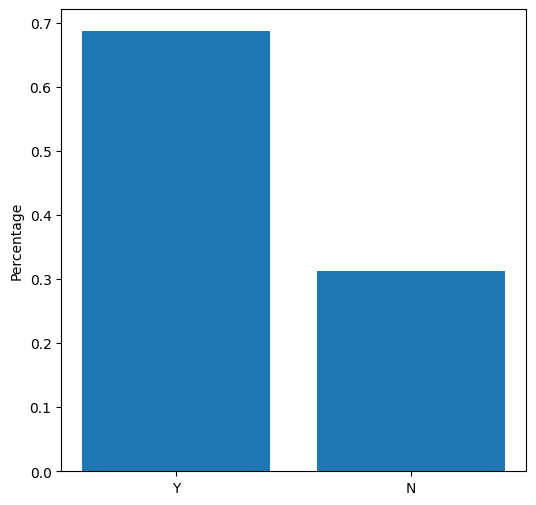

In [20]:
## Checking for data unbalance
plt.figure(figsize = (6,6))
plt.bar(Target_ratio.index,Target_ratio)
plt.ylabel('Percentage')
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encode Target Vairable</h3></li></ul>
</div>

In [21]:
#Using labelencoder to encode the target variable
lb=LabelEncoder()
lb.fit(loan_data.Loan_Status)
loan_data.Loan_Status=lb.transform(loan_data.Loan_Status)


In [22]:
loan_data.Loan_Status

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [23]:
#Using labelencoder to encode the target variable
lb=LabelEncoder()
lb.fit(loan_data['Loan_Status'])
loan_data['Loan_Status']=lb.transform(loan_data['Loan_Status'])

In [24]:
loan_data

,Loan_ID,Gender,ApplicantIncome,LoanAmount,Loan_Status
0,LP001002,Male,5849,146.412162,1
1,LP001003,Male,4583,128.000000,0
2,LP001005,Male,3000,66.000000,1
3,LP001006,Male,2583,120.000000,1
4,LP001008,Male,6000,141.000000,1
...,...,...,...,...,...
609,LP002978,Female,2900,71.000000,1
610,LP002979,Male,4106,40.000000,1
611,LP002983,Male,8072,253.000000,1
612,LP002984,Male,7583,187.000000,1


In [25]:
lb.classes_

array([0, 1])

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Data</h3></li></ul>
</div>

In [26]:
#Divide the dataset into independent and dependent variables
X=loan_data[['ApplicantIncome','LoanAmount']]
y=loan_data.Loan_Status

In [27]:
#Divide the dataset into independent and dependent variables
X=loan_data[['ApplicantIncome','LoanAmount']]
y=loan_data['Loan_Status']

In [28]:
scl=RobustScaler()
X=scl.fit_transform(X)

In [29]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,
                                            test_size=0.4) #40 percent of data will be used for testing purpose

<div style="background-color:##EDF9FF">
  <ul><li><h3>Linear SVM</h3></li></ul>
</div>

In [30]:
svc_loan=SVC(C=10,kernel='linear')

In [31]:
svc_loan.fit(X_train,y_train)

SVC(C=10, kernel='linear')

## Accuracy Score

In [32]:
pred=svc_loan.predict(X_test)
acc_svc_loan=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_svc_loan)

Accuracy Score:  0.6951219512195121


<div style="background-color:##EDF9FF">
  <ul><li><h3>Gaussian RBF</h3></li></ul>
</div>

In [33]:
svc_loan=SVC(C=10,kernel='rbf',gamma=2)

In [34]:
svc_loan.fit(X_train,y_train)

SVC(C=10, gamma=2)

In [35]:
svc_loan1=SVC(C=5,kernel='rbf',gamma=1)
svc_loan1.fit(X_train,y_train)

SVC(C=5, gamma=1)

## Accuracy Score

In [36]:
pred=svc_loan.predict(X_test)
acc_svc_loan=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_svc_loan)

Accuracy Score:  0.6788617886178862


In [37]:
pred1=svc_loan1.predict(X_test)
acc_svc_loan1=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc_svc_loan1)

Accuracy Score:  0.6666666666666666


<div style="background-color:##EDF9FF">
  <ul><li><h3>polynomial</h3></li></ul>
</div>

In [38]:
svc_loanp=SVC(C=10,kernel='poly')
svc_loanp.fit(X_train,y_train)

SVC(C=10, kernel='poly')

In [39]:
predp=svc_loanp.predict(X_test)
acc_svc_loanp=accuracy_score(y_test,predp)
print('Accuracy Score: ',acc_svc_loanp)

Accuracy Score:  0.6829268292682927
